<a href="https://colab.research.google.com/github/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato_Restaurant_Clustering_and_Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**
Zomato is an Indian restaurant aggregator and food delivery start-up founded by Deepinder Goyal and Pankaj Chaddah in 2008. Zomato provides information, menus and user-reviews of restaurants, and also has food delivery options from partner restaurants in select cities.

India is quite famous for its diverse multi cuisine available in a large number of restaurants and hotel resorts, which is reminiscent of unity in diversity. Restaurant business in India is always evolving. More Indians are warming up to the idea of eating restaurant food whether by dining outside or getting food delivered. The growing number of restaurants in every state of India has been a motivation to inspect the data to get some insights, interesting facts and figures about the Indian food industry in each city. So, this project focuses on analysing the Zomato restaurant data for each city in India.

The Project focuses on Customers and Company, you have  to analyze the sentiments of the reviews given by the customer in the data and made some useful conclusion in the form of Visualizations. Also, cluster the zomato restaurants into different segments. The data is vizualized as it becomes easy to analyse data at instant. The Analysis also solve some of the business cases that can directly help the customers finding the Best restaurant in their locality and for the company to grow up and work on the fields they are currently lagging in.

This could help in clustering the restaurants into segments. Also the data has valuable information around cuisine and costing which can be used in cost vs. benefit analysis

Data could be used for sentiment analysis. Also the metadata of reviewers can be used for identifying the critics in the industry. 

# **Attribute Information**

## **Zomato Restaurant names and Metadata**
Use this dataset for clustering part


1. Name : Name of Restaurants

2. Links : URL Links of Restaurants

3. Cost : Per person estimated Cost of dining

4. Collection : Tagging of Restaurants w.r.t. Zomato categories

5. Cuisines : Cuisines served by Restaurants

6. Timings : Restaurant Timings

## **Zomato Restaurant reviews**
Merge this dataset with Names and Matadata and then use for sentiment analysis part

1. Restaurant : Name of the Restaurant

2. Reviewer : Name of the Reviewer

3. Review : Review Text

4. Rating : Rating Provided by Reviewer

5. MetaData : Reviewer Metadata - No. of Reviews and followers

6. Time: Date and Time of Review

7. Pictures : No. of pictures posted with review

# Importing Libraries

In [1]:
# Importing all the important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')


# Loading and inspections

In [2]:
# Loading the data from github
meta_df = pd.read_csv('https://raw.githubusercontent.com/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/main/Zomato%20Restaurant%20names%20and%20Metadata.csv')
reviews_df = pd.read_csv('https://github.com/prabindebnath25/Zomato_Restaurant_Clustering_And_Sentiment_Analysis/blob/main/Zomato%20Restaurant%20reviews.csv?raw=true')

## Meta Data

In [3]:
# Get ine first 5 rows of the meta_df
meta_df.head()  

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,"1,300","Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,"1,200","Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


In [4]:
# to get the information about meta_df
meta_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         105 non-null    object
 1   Links        105 non-null    object
 2   Cost         105 non-null    object
 3   Collections  51 non-null     object
 4   Cuisines     105 non-null    object
 5   Timings      104 non-null    object
dtypes: object(6)
memory usage: 5.0+ KB


In [5]:
meta_df.isnull().sum() # Checking null values

Name            0
Links           0
Cost            0
Collections    54
Cuisines        0
Timings         1
dtype: int64

In [6]:
meta_df.duplicated().sum() # Check if there is duplicated rows

0

In [7]:
# Getting the 5 point summary of the data
meta_df.describe(include= 'all') 

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [8]:
meta_df.describe()

,Name,Links,Cost,Collections,Cuisines,Timings
count,105,105,105,51,105,104
unique,105,105,29,42,92,77
top,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,500,Food Hygiene Rated Restaurants in Hyderabad,"North Indian, Chinese",11 AM to 11 PM
freq,1,1,13,4,4,6


In [9]:
# checking for unique values in cost function
meta_df.Cost.value_counts()

500      13
600      10
700       8
1,200     7
400       6
1,000     6
200       5
800       5
1,500     5
1,300     4
350       3
1,600     3
750       3
550       3
900       3
1,100     3
1,700     2
150       2
1,400     2
450       2
1,900     2
300       1
2,500     1
850       1
650       1
1,800     1
2,800     1
1,750     1
250       1
Name: Cost, dtype: int64

In [10]:
# changing the data type of the cost function
meta_df['Cost'] = meta_df['Cost'].str.replace(",","").astype('int64')

## Reviews

In [11]:
# to get the first five rows of the data set 
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Metadata,Time,Pictures
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,"1 Review , 2 Followers",5/25/2019 15:54,0
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,"3 Reviews , 2 Followers",5/25/2019 14:20,0
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,"2 Reviews , 3 Followers",5/24/2019 22:54,0
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,"1 Review , 1 Follower",5/24/2019 22:11,0
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,"3 Reviews , 2 Followers",5/24/2019 21:37,0


In [12]:
# to get the information about the data
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Restaurant  10000 non-null  object
 1   Reviewer    9962 non-null   object
 2   Review      9955 non-null   object
 3   Rating      9962 non-null   object
 4   Metadata    9962 non-null   object
 5   Time        9962 non-null   object
 6   Pictures    10000 non-null  int64 
dtypes: int64(1), object(6)
memory usage: 547.0+ KB


In [13]:
# checking the number of null values in each columns
reviews_df.isnull().sum()

Restaurant     0
Reviewer      38
Review        45
Rating        38
Metadata      38
Time          38
Pictures       0
dtype: int64

In [14]:
# Checking the number of duplicated rows in reviews_df
reviews_df.duplicated().sum()

36

In [15]:
# drop duplicate rows
reviews_df.drop_duplicates(inplace = True)

In [16]:
# Checking the number of duplicated rows in reviews_df after removing duplicates
reviews_df.duplicated().sum()

0

In [17]:
# After revoving the duplicated we check null values
reviews_df.isnull().sum()


Restaurant    0
Reviewer      2
Review        9
Rating        2
Metadata      2
Time          2
Pictures      0
dtype: int64

Here we can see that almost all the null values are also gone, we now remove the remaining null values

In [18]:
# Removing the null value
reviews_df.dropna(inplace= True)

In [19]:
#checking Value of Rating Columns
reviews_df['Rating'].value_counts()

5       3826
4       2373
1       1735
3       1192
2        684
4.5       69
3.5       47
2.5       19
1.5        9
Like       1
Name: Rating, dtype: int64

Science there is only one row with rating as like we remove the row with rating 'Like' 

In [20]:
# remove the row with rating 'Like'
reviews_df = reviews_df[reviews_df['Rating'] !='Like']

In [21]:
# feature engineering the data
reviews_df['Reviews'],reviews_df['Followers']=reviews_df['Metadata'].str.split(',').str
reviews_df['Reviews'] = pd.to_numeric(reviews_df['Reviews'].str.split(' ').str[0])
reviews_df['Followers'] = pd.to_numeric(reviews_df['Followers'].str.split(' ').str[1])
reviews_df['Time']=pd.to_datetime(reviews_df['Time'])
reviews_df['Year'] = pd.DatetimeIndex(reviews_df['Time']).year
reviews_df['Month'] = pd.DatetimeIndex(reviews_df['Time']).month
reviews_df['Day'] = pd.DatetimeIndex(reviews_df['Time']).day
reviews_df['Hour'] = pd.DatetimeIndex(reviews_df['Time']).hour
reviews_df = reviews_df.drop(['Metadata'], axis =1)

In [22]:
reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9954 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Restaurant  9954 non-null   object        
 1   Reviewer    9954 non-null   object        
 2   Review      9954 non-null   object        
 3   Rating      9954 non-null   object        
 4   Time        9954 non-null   datetime64[ns]
 5   Pictures    9954 non-null   int64         
 6   Reviews     9954 non-null   int64         
 7   Followers   8380 non-null   float64       
 8   Year        9954 non-null   int64         
 9   Month       9954 non-null   int64         
 10  Day         9954 non-null   int64         
 11  Hour        9954 non-null   int64         
dtypes: datetime64[ns](1), float64(1), int64(6), object(4)
memory usage: 1011.0+ KB


In [23]:
#checking for null values
reviews_df.isna().sum()

Restaurant       0
Reviewer         0
Review           0
Rating           0
Time             0
Pictures         0
Reviews          0
Followers     1574
Year             0
Month            0
Day              0
Hour             0
dtype: int64

We can see that there are null values in the Followers clumns

In [24]:
# finning the nan values of followers by 0
reviews_df['Followers'].fillna(0,inplace=True)

In [25]:
# checking null values in the data set 
reviews_df.isnull().sum()

Restaurant    0
Reviewer      0
Review        0
Rating        0
Time          0
Pictures      0
Reviews       0
Followers     0
Year          0
Month         0
Day           0
Hour          0
dtype: int64

# EDA

## Meta Data

In [27]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)"
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM"
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no..."


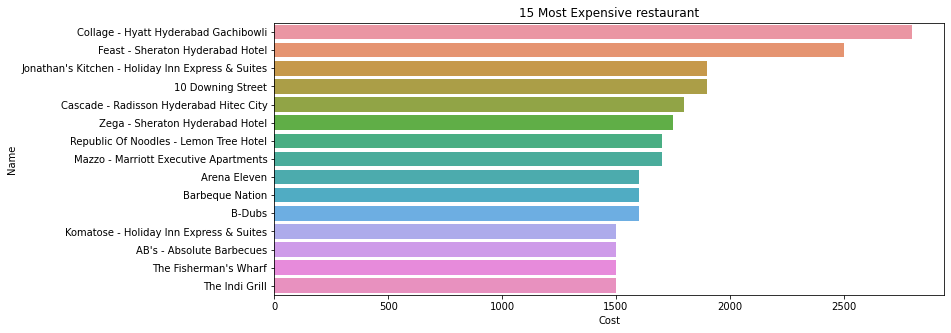

In [34]:
# checking most expencive
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[:15], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most Expensive restaurant')
plt.show()

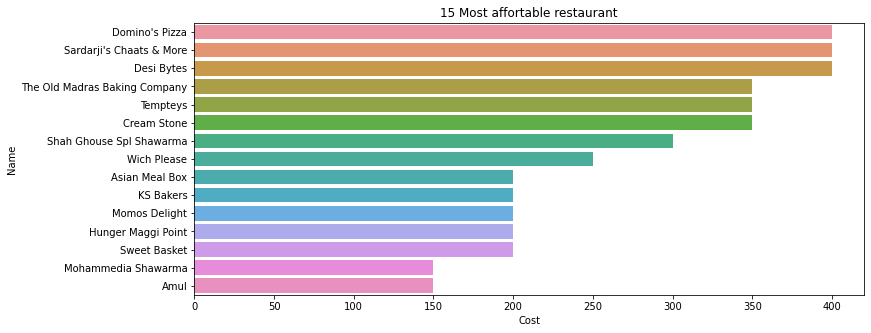

In [35]:
# checking  most afforatble Resturent
plt.figure(figsize = (12,5))
sns.barplot(data = meta_df.sort_values(by = 'Cost',ascending = False)[-15:], 
            y= 'Name', 
            x= 'Cost' )
plt.title('15 Most affortable restaurant')
plt.show()

In [30]:
meta_df['Cuisines']

0      Chinese, Continental, Kebab, European, South I...
1                         Biryani, North Indian, Chinese
2           Asian, Mediterranean, North Indian, Desserts
3      Biryani, North Indian, Chinese, Seafood, Bever...
4      Asian, Continental, North Indian, Chinese, Med...
                             ...                        
100                                     Fast Food, Salad
101                                       Bakery, Mithai
102                       North Indian, Biryani, Chinese
103                                            Fast Food
104                      Thai, Asian, Chinese, Malaysian
Name: Cuisines, Length: 105, dtype: object

In [39]:
# spliting the cusines and storing in list 
cuisine_list=meta_df.Cuisines.str.split(', ')
cuisine_list

0      [Chinese, Continental, Kebab, European, South ...
1                       [Biryani, North Indian, Chinese]
2         [Asian, Mediterranean, North Indian, Desserts]
3      [Biryani, North Indian, Chinese, Seafood, Beve...
4      [Asian, Continental, North Indian, Chinese, Me...
                             ...                        
100                                   [Fast Food, Salad]
101                                     [Bakery, Mithai]
102                     [North Indian, Biryani, Chinese]
103                                          [Fast Food]
104                    [Thai, Asian, Chinese, Malaysian]
Name: Cuisines, Length: 105, dtype: object

In [40]:
# storing all the cusines in a dict 
cuis_dict = {}
for names in cuisine_list:
    for name in names:
        if (name in cuis_dict):
            cuis_dict[name]+=1
        else:  
            cuis_dict[name]=1 

In [41]:
cuis_dict

{'Chinese': 43,
 'Continental': 21,
 'Kebab': 6,
 'European': 4,
 'South Indian': 9,
 'North Indian': 61,
 'Biryani': 16,
 'Asian': 15,
 'Mediterranean': 5,
 'Desserts': 13,
 'Seafood': 4,
 'Beverages': 5,
 'Goan': 1,
 'Healthy Food': 1,
 'Lebanese': 1,
 'American': 6,
 'Ice Cream': 2,
 'Street Food': 2,
 'Fast Food': 15,
 'BBQ': 2,
 'Italian': 14,
 'Finger Food': 2,
 'Burger': 5,
 'Japanese': 2,
 'Salad': 5,
 'Sushi': 4,
 'Mexican': 1,
 'Mughlai': 6,
 'Andhra': 6,
 'Bakery': 7,
 'Juices': 1,
 'Arabian': 2,
 'Hyderabadi': 4,
 'Cafe': 6,
 'Spanish': 1,
 'Wraps': 1,
 'Thai': 3,
 'Indonesian': 1,
 'Modern Indian': 2,
 'Momos': 4,
 'Pizza': 1,
 'North Eastern': 1,
 'Mithai': 1,
 'Malaysian': 1}

In [42]:
# converting the dict to a data frame 
cuis_df=pd.DataFrame.from_dict([cuis_dict]).transpose().reset_index().rename(columns={'index':'Cuisine',0:'Number of Restaurants'})

In [43]:
cuis_df

,Cuisine,Number of Restaurants
0,Chinese,43
1,Continental,21
2,Kebab,6
3,European,4
4,South Indian,9
5,North Indian,61
6,Biryani,16
7,Asian,15
8,Mediterranean,5
9,Desserts,13


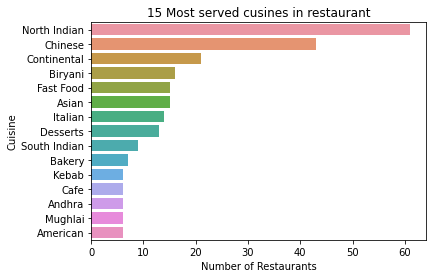

In [44]:
# graph for most cusines served in restaurant
sns.barplot(y='Cuisine',
            x="Number of Restaurants", 
            data=cuis_df, 
            order=cuis_df.sort_values('Number of Restaurants',ascending=False).Cuisine[:15])
plt.title('15 Most served cusines in restaurant')
plt.show()


## Reviews

In [45]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [46]:
reviews_df['Restaurant'].value_counts().reset_index().head(10)

,index,Restaurant
0,Beyond Flavours,100
1,KS Bakers,100
2,The Indi Grill,100
3,The Tilt Bar Republic,100
4,Yum Yum Tree - The Arabian Food Court,100
5,Aromas@11SIX,100
6,Komatose - Holiday Inn Express & Suites,100
7,Dine O China,100
8,Shree Santosh Dhaba Family Restaurant,100
9,Prism Club & Kitchen,100


Here we canm see that each resturent has 100 ratings and reviews

In [47]:
reviews_df['Reviewer'].value_counts().reset_index().head(10)

,index,Reviewer
0,Ankita,13
1,Parijat Ray,13
2,Kiran,12
3,Jay Mehta,11
4,Vedant Killa,11
5,Sravani,10
6,Priyanka,10
7,Siva Kumar,10
8,Age Of Foodies (Suraj Karambe),10
9,Manojkumar D Nambisan,10


In [51]:
# Value counts on rating
reviews_df['Rating'].value_counts().reset_index()

,index,Rating
0,5.0,3826
1,4.0,2373
2,1.0,1735
3,3.0,1192
4,2.0,684
5,4.5,69
6,3.5,47
7,2.5,19
8,1.5,9


In [52]:
# removing the row with rating as Like
reviews_df = reviews_df[reviews_df['Rating'] != 'Like']

In [53]:
# Converting the trating column as float
reviews_df['Rating'] = reviews_df['Rating'].astype(float)

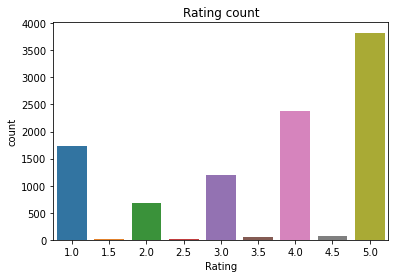

In [55]:
# Plot rating count
sns.countplot(reviews_df.Rating)
plt.title('Rating count')
plt.show()

In [57]:
# Lets find resturent with height abearge rating
restaura_rating_df = pd.DataFrame(reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False))
restaura_rating_df.head()

,Restaurant,Rating
3,AB's - Absolute Barbecues,4.88
11,B-Dubs,4.81
2,"3B's - Buddies, Bar & Barbecue",4.76
67,Paradise,4.70
35,Flechazo,4.66


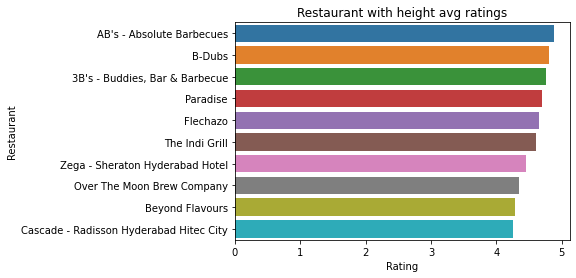

In [58]:
# Restaurant with height avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[:10],
            y = 'Restaurant', 
            x = 'Rating')
plt.title('Restaurant with height avg ratings')
plt.show()

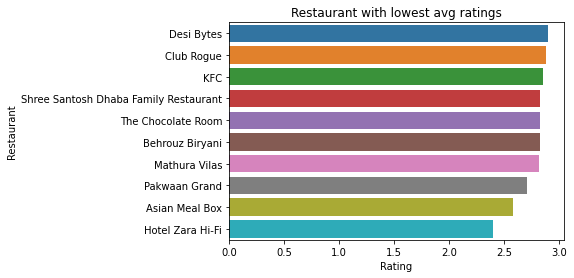

In [60]:
# Restaurant with lowest avg ratings
sns.barplot(data = reviews_df.groupby('Restaurant')['Rating'].mean().reset_index().sort_values(by= 'Rating', ascending = False)[-10:],
            y = 'Restaurant', x = 'Rating')
plt.title('Restaurant with lowest avg ratings')
plt.show()

In [61]:
reviews_df.head()

,Restaurant,Reviewer,Review,Rating,Time,Pictures,Reviews,Followers,Year,Month,Day,Hour
0,Beyond Flavours,Rusha Chakraborty,"The ambience was good, food was quite good . h...",5.0,2019-05-25 15:54:00,0,1,2.0,2019,5,25,15
1,Beyond Flavours,Anusha Tirumalaneedi,Ambience is too good for a pleasant evening. S...,5.0,2019-05-25 14:20:00,0,3,2.0,2019,5,25,14
2,Beyond Flavours,Ashok Shekhawat,A must try.. great food great ambience. Thnx f...,5.0,2019-05-24 22:54:00,0,2,3.0,2019,5,24,22
3,Beyond Flavours,Swapnil Sarkar,Soumen das and Arun was a great guy. Only beca...,5.0,2019-05-24 22:11:00,0,1,1.0,2019,5,24,22
4,Beyond Flavours,Dileep,Food is good.we ordered Kodi drumsticks and ba...,5.0,2019-05-24 21:37:00,0,3,2.0,2019,5,24,21


In [64]:
# Create a dataframe for the reviewers
df_Reviewer = reviews_df.groupby(['Reviewer']).agg({'Reviews': 'sum', 'Followers':'sum', 'Rating': 'mean'}).reset_index()
most_famous_reviewer=df_Reviewer[(df_Reviewer['Followers'] > 1000)&(df_Reviewer['Reviews']>100)]
most_famous_reviewer

,Reviewer,Reviews,Followers,Rating
39,ASH&B2,294,20793.0,3.333333
56,Aanchal Khemka,945,11605.0,3.600000
62,Aarti Kamath,417,5451.0,4.500000
79,Abc098,665,2275.0,3.000000
115,Abhilash Pradhan (AbTheFoodie),275,4160.0,5.000000
...,...,...,...,...
7291,Vivek Jain,171,1371.0,2.666667
7355,Yash Kumar Singh,486,6836.0,3.500000
7383,Yoga,186,3579.0,4.000000
7403,Yum Yum YUMMY !,534,1212.0,3.500000


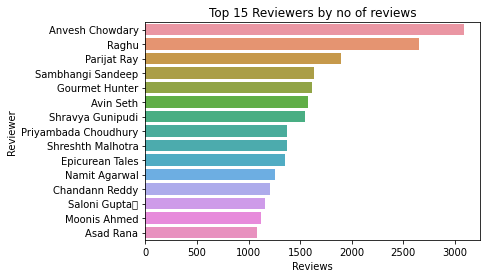

In [67]:
# Top 15 reviewers by review count
sns.barplot(data=df_Reviewer, x='Reviews', y='Reviewer', order=df_Reviewer.sort_values('Reviews',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of reviews')
plt.show()


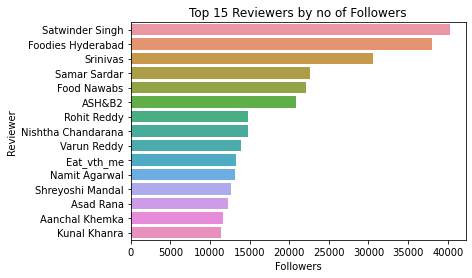

In [68]:
sns.barplot(data=df_Reviewer, x='Followers', y='Reviewer', order=df_Reviewer.sort_values('Followers',ascending=False).Reviewer[:15])
plt.title('Top 15 Reviewers by no of Followers')
plt.show()

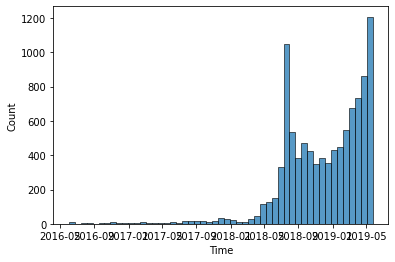

In [69]:
sns.histplot(reviews_df.Time)
plt.show()

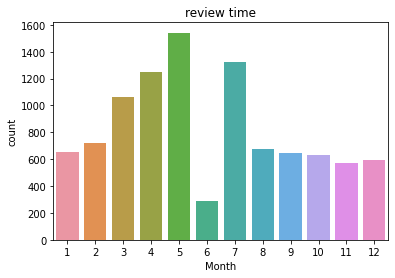

In [71]:
sns.countplot(reviews_df.Month)
plt.title('review time')
plt.show()

# Clustering

In [ ]:
meta_df.head()

,Name,Links,Cost,Collections,Cuisines,Timings,Cuisines_list,Cuisines_count
0,Beyond Flavours,https://www.zomato.com/hyderabad/beyond-flavou...,800,"Food Hygiene Rated Restaurants in Hyderabad, C...","Chinese, Continental, Kebab, European, South I...","12noon to 3:30pm, 6:30pm to 11:30pm (Mon-Sun)","[Chinese, Continental, Kebab, European, South ...",6
1,Paradise,https://www.zomato.com/hyderabad/paradise-gach...,800,Hyderabad's Hottest,"Biryani, North Indian, Chinese",11 AM to 11 PM,"[Biryani, North Indian, Chinese]",3
2,Flechazo,https://www.zomato.com/hyderabad/flechazo-gach...,1300,"Great Buffets, Hyderabad's Hottest","Asian, Mediterranean, North Indian, Desserts","11:30 AM to 4:30 PM, 6:30 PM to 11 PM","[Asian, Mediterranean, North Indian, Desserts]",4
3,Shah Ghouse Hotel & Restaurant,https://www.zomato.com/hyderabad/shah-ghouse-h...,800,Late Night Restaurants,"Biryani, North Indian, Chinese, Seafood, Bever...",12 Noon to 2 AM,"[Biryani, North Indian, Chinese, Seafood, Beve...",5
4,Over The Moon Brew Company,https://www.zomato.com/hyderabad/over-the-moon...,1200,"Best Bars & Pubs, Food Hygiene Rated Restauran...","Asian, Continental, North Indian, Chinese, Med...","12noon to 11pm (Mon, Tue, Wed, Thu, Sun), 12no...","[Asian, Continental, North Indian, Chinese, Me...",5


In [ ]:
meta_df['Cuisines'] = meta_df['Cuisines'].apply(lambda x: x.lower())

In [ ]:
cuisine_df = meta_df[['Name','Cost','Cuisines']]

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i..."
1,Paradise,800,"biryani, north indian, chinese"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med..."


In [ ]:
# spliting the cuisine and storing in list 
def cuisine_list(cuisines):
   all_cuisines = list(set(cuisines.split(', ')))
   return all_cuisines

In [ ]:
cuisine_df['cuisine']=cuisine_df['Cuisines'].apply(lambda x : cuisine_list(x))

In [ ]:
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...","[continental, north indian, european, chinese,..."
1,Paradise,800,"biryani, north indian, chinese","[biryani, north indian, chinese]"
2,Flechazo,1300,"asian, mediterranean, north indian, desserts","[mediterranean, north indian, asian, desserts]"
3,Shah Ghouse Hotel & Restaurant,800,"biryani, north indian, chinese, seafood, bever...","[biryani, north indian, seafood, beverages, ch..."
4,Over The Moon Brew Company,1200,"asian, continental, north indian, chinese, med...","[mediterranean, north indian, continental, asi..."


In [ ]:
# Transform each element of a list-like to a row 
cuisine_df=cuisine_df.explode('cuisine')
cuisine_df.head()

,Name,Cost,Cuisines,cuisine
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",continental
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",north indian
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",european
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",chinese
0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",south indian


In [ ]:
# checking unique values of cuisine
set(cuisine_df["cuisine"])

{'american',
 'andhra',
 'arabian',
 'asian',
 'bakery',
 'bbq',
 'beverages',
 'biryani',
 'burger',
 'cafe',
 'chinese',
 'continental',
 'desserts',
 'european',
 'fast food',
 'finger food',
 'goan',
 'healthy food',
 'hyderabadi',
 'ice cream',
 'indonesian',
 'italian',
 'japanese',
 'juices',
 'kebab',
 'lebanese',
 'malaysian',
 'mediterranean',
 'mexican',
 'mithai',
 'modern indian',
 'momos',
 'mughlai',
 'north eastern',
 'north indian',
 'pizza',
 'salad',
 'seafood',
 'south indian',
 'spanish',
 'street food',
 'sushi',
 'thai',
 'wraps'}

In [ ]:
cuisine_df['cuisine']

0       continental
0      north indian
0          european
0           chinese
0      south indian
           ...     
103       fast food
104         chinese
104       malaysian
104           asian
104            thai
Name: cuisine, Length: 313, dtype: object

## Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert

In [ ]:
# Brinning all the cuisines into their respective supersets spicy food, Healthy food, Fast Food,Dessert
l=[]
for i in cuisine_df['cuisine']:   
  if (i=='hyderabadi')| (i=='asian')|(i=='kebab')|(i=='north indian')|(i=='modern indian')|(i=='continental')|(i=='bbq')|(i=='biryani')|(i=='indonesian')|(i=='mughlai')|(i=='malaysian'):
    l.append('spicy food')
  if (i=='andhra')|(i=='north eastern')|(i=='lebanese')|(i=='salad')|(i=='south indian')|(i=='italian')|(i=='european')|(i=='mediterranean')|(i=='american')|(i=='thai')|(i=='arabian')|(i=='seafood')|(i=='mexican')|(i=='healthy food')|(i=='goan')|(i=='spanish'):
    l.append('Healthy food')
  if (i=='momos')|(i=='street food')|(i=='cafe')|(i=='chinese')|(i=='japanese')|(i=='pizza')|(i=='wraps')|(i=='burger')|(i=='fast food')|(i=='finger food')|(i=='sushi'):
    l.append('fast food')
  if (i=='bakery')|(i=='beverages')|(i=='desserts')|(i=='juices')|(i=='ice cream')|(i=='mithai'):
    l.append('Dessert')

In [ ]:
l

['spicy food',
 'spicy food',
 'Healthy food',
 'fast food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'spicy food',
 'fast food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'Dessert',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Dessert',
 'fast food',
 'Healthy food',
 'spicy food',
 'spicy food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'Dessert',
 'Dessert',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'Healthy food',
 'fast food',
 'spicy food',
 'Healthy food',
 'spicy food',
 'Healthy food',
 'fast food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'fast food',
 'spicy food',
 'spicy food',
 'fast food',
 'spicy food',
 '

In [ ]:
# updating the data frame with cuisines superset
superset_cuisine=pd.DataFrame(l)
superset_cuisine.columns=['cuisine']
superset_cuisine

,cuisine
0,spicy food
1,spicy food
2,Healthy food
3,fast food
4,Healthy food
...,...
308,fast food
309,fast food
310,spicy food
311,spicy food


In [ ]:
superset_cuisine.value_counts()

cuisine     
spicy food      135
fast food        85
Healthy food     64
Dessert          29
dtype: int64

In [ ]:
# droping the cuisine feature and creating new data frame with cuisine superset
cuisine_df.reset_index(inplace=True)
cuisine_df.drop(['cuisine'],axis=1,inplace=True)






In [ ]:
dataset=pd.concat([cuisine_df,superset_cuisine],axis=1)

In [ ]:
dataset.head()

,index,Name,Cost,Cuisines,cuisine
0,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
1,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",spicy food
2,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food
3,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",fast food
4,0,Beyond Flavours,800,"chinese, continental, kebab, european, south i...",Healthy food


# Text processing

In [ ]:
reviews = reviews_df.Review
reviews

0       The ambience was good, food was quite good . h...
1       Ambience is too good for a pleasant evening. S...
2       A must try.. great food great ambience. Thnx f...
3       Soumen das and Arun was a great guy. Only beca...
4       Food is good.we ordered Kodi drumsticks and ba...
                              ...                        
9995    Madhumathi Mahajan Well to start with nice cou...
9996    This place has never disappointed us.. The foo...
9997    Bad rating is mainly because of "Chicken Bone ...
9998    I personally love and prefer Chinese Food. Had...
9999    Checked in here to try some delicious chinese ...
Name: Review, Length: 9954, dtype: object